# Using Simulink from Jupyter

Tested in a GitHub Codespaces environment.

Modified code to remove dependency to Simulink Compiler

In [1]:
function res = sim_the_model(args)
    % Utility function to simulate a Simulink model with the specified parameters.
    % 
    % Inputs:
    %    StopTime: simulation stop time, default is nan
    %    TunableParameters:
    %       A struct where the fields are the tunanle referenced
    %       workspace variables with the values to use for the
    %       simulation.
    %    
    %    Values of nan or empty for the above inputs indicate that sim should
    %    run with the default values set in the model.
    % 
    % Outputs:
    %    res: A structure with the time and data values of the logged signals.
    
    arguments
        args.StopTime (1,1) double = nan
        args.TunableParameters = []
    end
    
        %% Create the SimulationInput object
        si = Simulink.SimulationInput('suspension_3dof');
        %% Load the StopTime into the SimulationInput object
        if ~isnan(args.StopTime)
            si = si.setModelParameter('StopTime', num2str(args.StopTime));
        end
        
        %% Load the specified tunable parameters into the simulation input object
        if isstruct(args.TunableParameters) 
            tpNames = fieldnames(args.TunableParameters);
            for itp = 1:numel(tpNames)
                tpn = tpNames{itp};
                tpv = args.TunableParameters.(tpn);
                si = si.setVariable(tpn, tpv);
            end
        end
    
        %% call sim
        res = sim(si);
        
        %% Extract the simulation results
        % Package the time and data values of the logged signals into a structure
        % res = extractResults(so,nan);
    
    end

Check that you have the necessary toolboxes installed

In [2]:
ver

-----------------------------------------------------------------------------------------------------
MATLAB Version: 24.1.0.2578822 (R2024a) Update 2
MATLAB License Number: 40447121
Operating System: Linux 6.2.0-1019-azure #19~22.04.1-Ubuntu SMP Wed Jan 10 22:57:03 UTC 2024 x86_64
Java Version: Java 1.8.0_202-b08 with Oracle Corporation Java HotSpot(TM) 64-Bit Server VM mixed mode
-----------------------------------------------------------------------------------------------------
MATLAB                                                Version 24.1        (R2024a)
Simulink                                              Version 24.1        (R2024a)
Curve Fitting Toolbox                                 Version 24.1        (R2024a)
Deep Learning Toolbox                                 Version 24.1        (R2024a)
Image Processing Toolbox                              Version 24.1        (R2024a)
MATLAB Compiler                                       Version 24.1        (R2024a)
MATLAB Compiler

To access the code folder, navigate to the workspaces directory

In [3]:
cd ../../workspaces/matlab-with-python-book/

In [4]:
ls

 1_intro.md
 2_End-to-end_project_with_MATLAB_and_Python.md
 3_Set-up_MATLAB_and_Python.md
 4_Call_Python_from_MATLAB.md
 5_Call_Python_AI_libraries_from_MATLAB.md
 6_Call_MATLAB_from_Python.md
 7_Simulink_with_Python.md
 8_Resources.md
 code
 LICENSE
 matlab_notebooks
'MATLAB with Python - Book - v1.5.docx'
'MATLAB with Python - Book - v1.5.pdf'
'MATLAB with Python - Book - v1.5 - print.docx'
'MATLAB with Python - Book - v1.5 - print.pdf'
 media
 mpm
 mpm.1
 README.md
 SECURITY.md
 slprj
 suspension_3dof.slxc
 Using_Simulink_from_Jupyter.ipynb



In [5]:
addpath('code')

In [6]:
res = sim_the_model('StopTime', 30)

res = 
  Simulink.SimulationOutput:
              ScopeData: [1x1 struct] 
                logsout: [1x1 Simulink.SimulationData.Dataset] 

     SimulationMetadata: [1x1 Simulink.SimulationMetadata] 
           ErrorMessage: [0x0 char]

In [7]:
res.SimulationMetadata

ans = 
  SimulationMetadata with properties:

        ModelInfo: [1x1 struct]
       TimingInfo: [1x1 struct]
    ExecutionInfo: [1x1 struct]
       UserString: ''
         UserData: []

In [8]:
res.ScopeData

ans = struct with fields:
         time: [30002x1 double]
      signals: [1x1 struct]
    blockName: 'suspension_3dof/Scope'

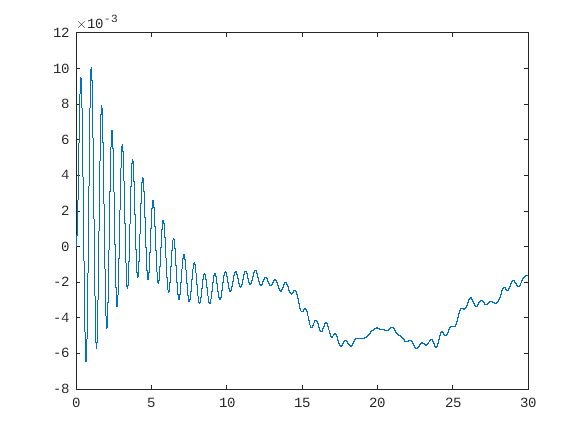

In [13]:
time = res.ScopeData.time;
signals = res.ScopeData.signals.values;
plot(time, signals)

In [30]:
sec = seconds(time);
sec(end)

ans = duration
   30 sec

In [32]:
TT = timetable(seconds(time), signals);
head(TT)

         Time          signals  
    ______________    __________

    0 sec                      0
    0.00017923 sec    3.7556e-09
    0.0010754 sec     1.3576e-07
    0.0020754 sec     5.0795e-07
    0.0030754 sec     1.1204e-06
    0.0040754 sec     1.9762e-06
    0.0050754 sec     3.0784e-06
    0.0060754 sec       4.43e-06



In [10]:
tunableParams.Mb = 5000;

In [11]:
res2 = sim_the_model('StopTime', 30,'TunableParameters', tunableParams)

res2 = 
  Simulink.SimulationOutput:
              ScopeData: [1x1 struct] 
                logsout: [1x1 Simulink.SimulationData.Dataset] 

     SimulationMetadata: [1x1 Simulink.SimulationMetadata] 
           ErrorMessage: [0x0 char]

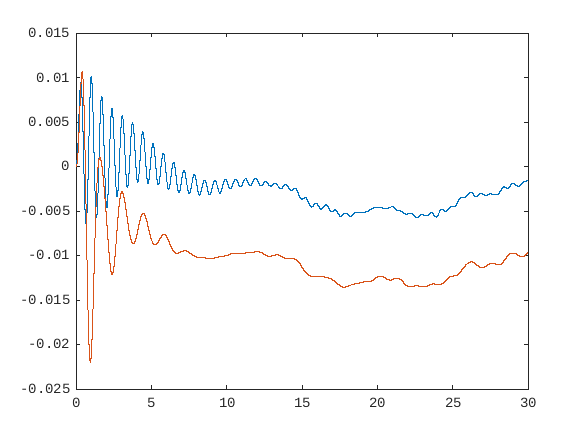

In [12]:
time2 = res2.ScopeData.time;
signals2 = res2.ScopeData.signals.values;
plot(time, signals, time2, signals2)

In [40]:
size(signals)
size(signals2)

ans = 1x2 double
       30002           1

ans = 1x2 double
       30003           1

In [41]:
TT.signals2 = signals2(1:end-1);
head(TT)

         Time          signals       signals2 
    ______________    __________    __________

    0 sec                      0             0
    0.00017923 sec    3.7556e-09    6.5352e-11
    0.0010754 sec     1.3576e-07    2.3649e-09
    0.0020754 sec     5.0795e-07    4.7916e-08
    0.0030754 sec     1.1204e-06     1.542e-07
    0.0040754 sec     1.9762e-06     3.248e-07
    0.0050754 sec     3.0784e-06    5.6327e-07
    0.0060754 sec       4.43e-06    8.7314e-07



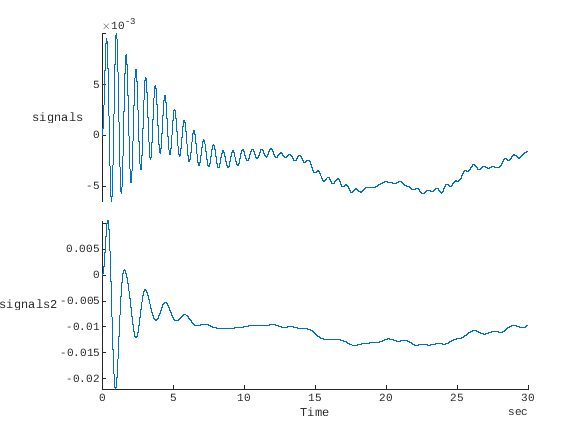

In [42]:
stackedplot(TT)